# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import torch

from maddpg_agent import Agent
from collections import deque
from unityagents import UnityEnvironment

%matplotlib inline

In [7]:
TARGET_SCORE = 0.51
EPISODES = 100
PRINT_EVERY = 10
ADD_NOISE = True

In [8]:
# MADDPG function

def maddpg(n_episodes=2000, max_t=1000, train_mode=True):
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode

    """
    scores_queue = deque(maxlen=EPISODES)
    scores_arr = []
    average_score = []
    best_score = -np.inf
    best_episode = 0
    already_solved = False    

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]         # reset environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get states 
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)
        while True:
            actions = get_actions(states, ADD_NOISE)           # choose agent actions 
            env_info = env.step(actions)[brain_name]           # send agents' actions to the environment
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # get agents' next states
            rewards = env_info.rewards                         # get rewards
            done = env_info.local_done                         # episode state 
            agent_0.step(states, actions, rewards[0], next_states, done, 0) # learn agent 1 
            agent_1.step(states, actions, rewards[1], next_states, done, 1) # Learn agent 2
            scores += np.max(rewards)                          # add the best score
            states = next_states                               # roll over states to next time step
            if np.any(done):                                   # exit loop if episode finished
                break

        episode_best_score = np.max(scores)
        scores_queue.append(episode_best_score)
        scores_arr.append(episode_best_score)
        average_score.append(np.mean(scores_queue))

        # save best score                        
        if episode_best_score > best_score:
            best_score = episode_best_score
            best_episode = i_episode
        
        # print results
        if i_episode % PRINT_EVERY == 0:
            print('Episodes {:0>4d}-{:0>4d}\t Highest Reward: {:.3f}\t Lowest Reward: {:.3f}\t Average Score: {:.3f}'.format(
                i_episode-PRINT_EVERY, i_episode, np.max(scores_arr[-PRINT_EVERY:]), np.min(scores_arr[-PRINT_EVERY:]), average_score[-1]))

        # determine if environment is solved and keep best performing models
        if average_score[-1] >= TARGET_SCORE:
            print('<-- Environment solved in {:d} episodes! \
                \n<-- Average Score: {:.3f} over past {:d} episodes'.format(
                    i_episode-EPISODES, average_score[-1], EPISODES))
            already_solved = True
            # save weights
            torch.save(agent_0.actor_local.state_dict(), 'checkpoint_actor_0.pth')
            torch.save(agent_0.critic_local.state_dict(), 'checkpoint_critic_0.pth')
            torch.save(agent_1.actor_local.state_dict(), 'checkpoint_actor_1.pth')
            torch.save(agent_1.critic_local.state_dict(), 'checkpoint_critic_1.pth')
            break
           
            
    return scores_arr, average_score

In [9]:
def get_actions(states, add_noise):
    '''gets actions for each agent and a single array with both actions'''
    action_0 = agent_0.act(states, add_noise)    # agent 0 chooses an action
    action_1 = agent_1.act(states, add_noise)    # agent 1 chooses an action
    return np.concatenate((action_0, action_1), axis=0).flatten()

In [10]:
# initialize agents
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

In [11]:
"""BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
LR_ACTOR = 1e-3         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
LEARN_EVERY = 5         # learning timestep interval
LEARN_NUM = 5           # number of learning passes
GAMMA = 0.99            # discount factor
TAU = 7e-2              # for soft update of target parameters
OU_SIGMA = 0.2          # Ornstein-Uhlenbeck noise parameter, volatility
OU_THETA = 0.11         # Ornstein-Uhlenbeck noise parameter, speed of mean reversion
EPS_START = 5.5         # initial value for epsilon in noise decay process in Agent.act()
EPS_EP_END = 250        # episode to end the noise decay process
EPS_FINAL = 0           # final value for epsilon after decay
"""

'BUFFER_SIZE = int(1e6)  # replay buffer size\nBATCH_SIZE = 128        # minibatch size\nLR_ACTOR = 1e-3         # learning rate of the actor\nLR_CRITIC = 1e-3        # learning rate of the critic\nWEIGHT_DECAY = 0        # L2 weight decay\nLEARN_EVERY = 5         # learning timestep interval\nLEARN_NUM = 5           # number of learning passes\nGAMMA = 0.99            # discount factor\nTAU = 7e-2              # for soft update of target parameters\nOU_SIGMA = 0.2          # Ornstein-Uhlenbeck noise parameter, volatility\nOU_THETA = 0.11         # Ornstein-Uhlenbeck noise parameter, speed of mean reversion\nEPS_START = 5.5         # initial value for epsilon in noise decay process in Agent.act()\nEPS_EP_END = 250        # episode to end the noise decay process\nEPS_FINAL = 0           # final value for epsilon after decay\n'

In [12]:
scores, avgs = maddpg()

Episodes 0000-0010	 Highest Reward: 0.000	 Lowest Reward: 0.000	 Average Score: 0.000
Episodes 0010-0020	 Highest Reward: 0.000	 Lowest Reward: 0.000	 Average Score: 0.000
Episodes 0020-0030	 Highest Reward: 0.100	 Lowest Reward: 0.000	 Average Score: 0.003
Episodes 0030-0040	 Highest Reward: 0.100	 Lowest Reward: 0.000	 Average Score: 0.010
Episodes 0040-0050	 Highest Reward: 0.000	 Lowest Reward: 0.000	 Average Score: 0.008
Episodes 0050-0060	 Highest Reward: 0.100	 Lowest Reward: 0.000	 Average Score: 0.008
Episodes 0060-0070	 Highest Reward: 0.100	 Lowest Reward: 0.000	 Average Score: 0.009
Episodes 0070-0080	 Highest Reward: 0.000	 Lowest Reward: 0.000	 Average Score: 0.008
Episodes 0080-0090	 Highest Reward: 0.100	 Lowest Reward: 0.000	 Average Score: 0.008
Episodes 0090-0100	 Highest Reward: 0.100	 Lowest Reward: 0.000	 Average Score: 0.008
Episodes 0100-0110	 Highest Reward: 0.000	 Lowest Reward: 0.000	 Average Score: 0.008
Episodes 0110-0120	 Highest Reward: 0.100	 Lowest Rewa

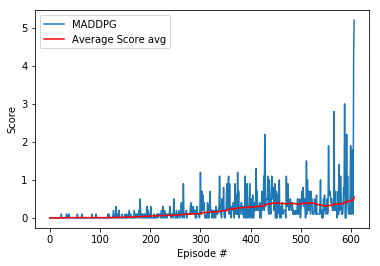

In [13]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Average Score avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

In [14]:
env.close()